In [ ]:
#Khởi tạo models 

import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense,Activation,Dropout,Conv2D,MaxPooling2D,Flatten
from keras.models import  Sequential
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import pandas as pd
from tensorflow.keras.models import load_model


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
train_dataset = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
horizontal_flip=True)
validation_dataset = ImageDataGenerator(rescale=1./255)
test_dataset = ImageDataGenerator(rescale=1./255)

training_generator = train_dataset.flow_from_directory(
                      '/content/drive/MyDrive/Colab Notebooks/Money/train',
                        target_size=(90, 90),
                        batch_size=50,
                        class_mode="categorical")
validation_generator = validation_dataset.flow_from_directory(
                        "/content/drive/MyDrive/Colab Notebooks/Money/test",
                         target_size=(90, 90),
                          batch_size=50,
                          
                         class_mode="categorical")

Mounted at /content/drive/
Found 2826 images belonging to 3 classes.
Found 187 images belonging to 3 classes.


In [ ]:
training_generator.class_indices

{'10.000': 0, '20000': 1, '50000': 2}

In [ ]:

model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same', input_shape=(90,90,3)))
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
#model.add(Dropout(0.3))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.1))
model.add(Dense(3,activation='softmax'))

#compiling the model..
#from tensorflow.keras.optimizers import SGD
#opt = SGD(lr=0.01, momentum=0.9)
#from keras.backend import categorical_crossentropy
#model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
#model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()
from tensorflow.keras.optimizers import Adam
opt = Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 90, 90, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 45, 45, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 45, 45, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 22, 22, 64)       0         
 2D)                                                    

In [ ]:
history = model.fit(training_generator,batch_size=128,epochs=20,verbose=1,validation_data=validation_generator)


Epoch 1/20
57/57 [==============================] - 745s 13s/step - loss: 1.4708 - accuracy: 0.4636 - val_loss: 0.2505 - val_accuracy: 0.8556
Epoch 2/20
57/57 [==============================] - 31s 536ms/step - loss: 0.2423 - accuracy: 0.9038 - val_loss: 0.0176 - val_accuracy: 1.0000
Epoch 3/20
57/57 [==============================] - 30s 532ms/step - loss: 0.0754 - accuracy: 0.9745 - val_loss: 0.0265 - val_accuracy: 1.0000
Epoch 4/20
57/57 [==============================] - 30s 532ms/step - loss: 0.0458 - accuracy: 0.9858 - val_loss: 0.0021 - val_accuracy: 1.0000
Epoch 5/20
57/57 [==============================] - 30s 533ms/step - loss: 0.2057 - accuracy: 0.9225 - val_loss: 0.1148 - val_accuracy: 0.9358
Epoch 6/20
57/57 [==============================] - 31s 546ms/step - loss: 0.0861 - accuracy: 0.9735 - val_loss: 0.0010 - val_accuracy: 1.0000
Epoch 7/20
57/57 [==============================] - 31s 547ms/step - loss: 0.0442 - accuracy: 0.9855 - val_loss: 1.7953e-04 - val_accuracy: 1.0

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/CNN_Money.h5')
from keras.models import load_model
model=load_model('/content/drive/MyDrive/Colab Notebooks/CNN_Money.h5')

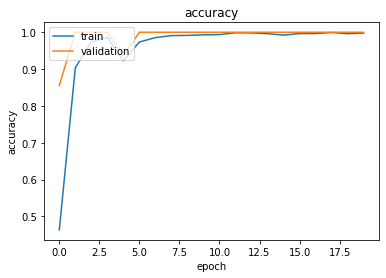

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show()

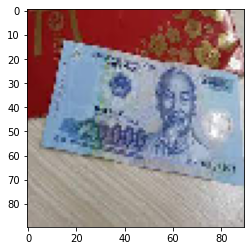

In [ ]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
img=load_img('20nghin.jpeg',target_size=(90,90,3))
plt.imshow(img)

In [ ]:
img=img_to_array(img)  # tạo mảng
#img = img[:,:,0]  #hinh test là 3 màu RGB, nhưng tâp train là 1 màu xám
img=img.reshape(1,90,90,3)
img=img.astype('float32')
img=img/255
import numpy as np
val= np.argmax(model.predict(img),axis=1)   #vi tri so 46
if val == 1:
    print("20.000")
if val == 0:
    print("10.000")
if val == 2 :
    print("50.000")

20.000


In [ ]:
training_generator.class_indices

{'10.000': 0, '20000': 1, '50000': 2}

In [ ]:
training_generator.class_indices

In [ ]:

from google.colab import drive
drive.mount('/content/drive')
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('Money.ipynb')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
--2022-05-19 09:03:25--  https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1864 (1.8K) [text/plain]
Saving to: ‘colab_pdf.py’

colab_pdf.py        100%[===================>]   1.82K  --.-KB/s    in 0s      

2022-05-19 09:03:25 (32.1 MB/s) - ‘colab_pdf.py’ saved [1864/1864]





Extracting templates from packages: 100%
[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/Money.ipynb to pdf
[NbConvertApp] Support files will be in Money_files/
[NbConvertApp] Making directory ./Money_files
[NbConvertApp] Making directory ./Money_files
[NbConvertApp

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

'File ready to be Downloaded and Saved to Drive'